# EXPLORATION 18. 문자를 읽을 수 있는 딥러닝

## 1. 데이터셋 준비

In [103]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt
import keras_ocr
import cv2

In [83]:
image_path = os.getenv('HOME')+'/aiffel/ocr_python/image'
file_list = sorted(os.listdir(image_path))
file_list

['ganpan1.jpg', 'ganpan2.jpg', 'ganpan3.jpg', 'ganpan4.jpg']

## 2. Google OCR API TEST

In [84]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [85]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'
# 모델 구현
for file in file_list:
        try:
            print(f"{file}")
            detect_text(os.path.join(image_path,file))
        except:
            continue

ganpan1.jpg
Texts:

"AA
"

"AA"
bounds: (3,273),(32,273),(32,290),(3,290)
ganpan2.jpg
Texts:

"진주교회
으0건축사사무소이제=
용한양 사진관
Global 244|
교린마트
*b KB국민은행
KB금용그룹
"

"진주"

"교회"

"으"

"0"

"건축사"

"사무소"

"이제"

"="

"용"

"한양"

"사진관"

"Global"

"244|"

"교린"

"마트"

"*"

"b"

"KB"

"국민"

"은행"

"KB"

"금용"

"그룹"
bounds: (119,315),(127,315),(127,325),(119,325)
ganpan3.jpg
Texts:

"Lunch Menu
점심
메뉴
오항수육
코스
1인분 가격입니다.
В
C
S
코스
코스
코스
코스
18,000원
22,000원
26,000원
29,000원
샐러드
샐러드
샐러드
샐러드
오항수욕 / 연혼재
인상박갈비
서울덕
혼제동구이
오항수욕 / 연훈제
오항수육 / 연혼제
오리너비아니
혼재동구이
식사(죽)
후식
오항수육 / 연혼재
인삼학갈비
혼재통구이
식사(죽)
서울택
훈재동구어
2인분 이상
주문가능하십니다.
식사(즉)
후식
후식
Above menu requires
aminimum order of two
식사(죽)
후식
"

"Lunch"

"Menu"

"점심"

"메뉴"

"오항"

"수육"

"코스"

"1"

"인분"

"가격"

"입니다"

"."

"В"

"C"

"S"

"코스"

"코스"

"코스"

"코스"

"18,000"

"원"

"22,000"

"원"

"26,000"

"원"

"29,000"

"원"

"샐러드"

"샐러드"

"샐러드"

"샐러드"

"오항"

"수욕"

"/"

"연"

"혼재"

"인상"

"박갈비"

"서울"

"덕"

"혼"

"제동"

"구이"

"오항"

"수욕"

"/"

"연"

"훈제"

"오항"

"수육"

"/"

"연혼"

"제"

"오리"

"너비아니

## 3. Keras-OCR TEST

In [99]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [100]:
images = [keras_ocr.tools.read(os.path.join(image_path, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(image_path, file)]) for file in file_list]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


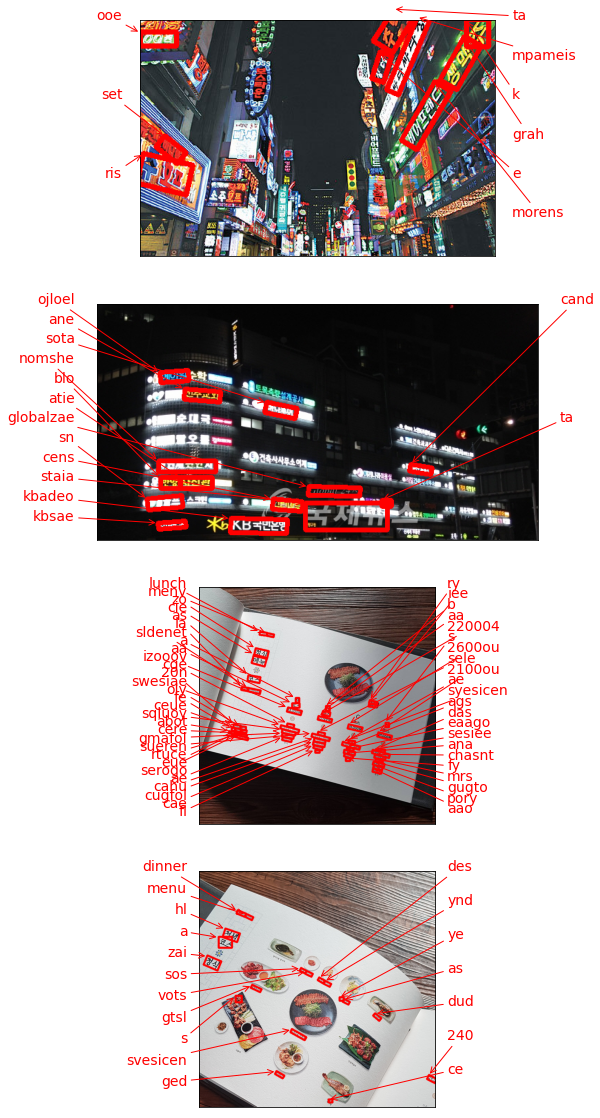

In [ ]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 4. Tesseract TEST

In [104]:
# 1.  OCR 엔진 모드(–oem):
# 0 - 레거시 엔진 전용.
# 1 - 신경망 LSTM 엔진 전용.
# 2 - 레거시 + LSTM 엔진.
# 3 - 사용 가능한 항목을 기반으로 한 기본값입니다.

# 2. 페이지 분할 모드(–psm):
# 0 - 방향 및 스크립트 감지(OSD) 전용.
# 1 - OSD를 사용한 자동 페이지 분할.
# 2 - 자동 페이지 분할이지만 OSD 또는 OCR은 없습니다.
# 3 - 완전 자동 페이지 분할이지만 OSD는 없습니다. (기본)
# 4 - 가변 크기의 단일 텍스트 열을 가정합니다.
# 5 - 세로로 정렬된 텍스트의 균일한 단일 블록을 가정합니다.
# 6 - 하나의 균일한 텍스트 블록을 가정합니다.
# 7 - 이미지를 단일 텍스트 줄로 취급합니다.
# 8 - 이미지를 한 단어로 취급합니다.
# 9 - 이미지를 원 안의 한 단어로 취급합니다.
# 10 - 이미지를 단일 문자로 취급합니다.
# 11 - 희소 텍스트. 특정 순서 없이 가능한 한 많은 텍스트를 찾습니다.
# 12 - OSD가 있는 희소 텍스트.
# 13 - 원시 라인. Tesseract 관련 해킹을 우회하여 이미지를 단일 텍스트 줄로 취급합니다.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [105]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image/'
img_file_path = work_dir + 'ganpan2.jpg'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/image/0000.png
/aiffel/aiffel/ocr_python/image/0001.png
/aiffel/aiffel/ocr_python/image/0002.png
/aiffel/aiffel/ocr_python/image/0003.png
/aiffel/aiffel/ocr_python/image/0004.png
/aiffel/aiffel/ocr_python/image/0005.png
/aiffel/aiffel/ocr_python/image/0006.png
/aiffel/aiffel/ocr_python/image/0007.png
/aiffel/aiffel/ocr_python/image/0008.png
/aiffel/aiffel/ocr_python/image/0009.png
/aiffel/aiffel/ocr_python/image/0010.png
/aiffel/aiffel/ocr_python/image/0011.png


In [ ]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

6  '

개

~ 비

~


ㆍ

.


0 0

나

21 0 |

(8

Done


## 5. 테스트 결과 정리

### 1) Google OCR

<function matplotlib.pyplot.show(close=None, block=None)>

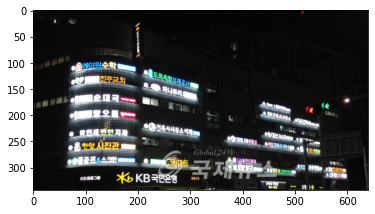

In [88]:
ocr_image = os.getenv('HOME')+'/aiffel/ocr_python/image/ganpan2.jpg'
img_bgr = cv2.imread(ocr_image)
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show

In [89]:
detect_text(ocr_image)

Texts:

"진주교회
으0건축사사무소이제=
용한양 사진관
Global 244|
교린마트
*b KB국민은행
KB금용그룹
"

"진주"

"교회"

"으"

"0"

"건축사"

"사무소"

"이제"

"="

"용"

"한양"

"사진관"

"Global"

"244|"

"교린"

"마트"

"*"

"b"

"KB"

"국민"

"은행"

"KB"

"금용"

"그룹"
bounds: (119,315),(127,315),(127,325),(119,325)


- Google OCR이라고 해도 어두운 사진과 화질이 안좋아져서 그런지 몇몇개의 글자를 인식을 못하는걸 확인하였다.

### 2) Keras-OCR

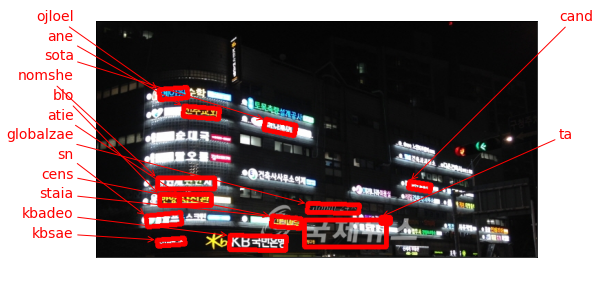

In [72]:
from IPython.display import Image
Image(os.getenv('HOME')+'/aiffel/ocr_python/image/keras.png')


- Keras도 google OCR과 사정은 크게 다르지 않았다. 옆으로 누워있는 텍스트나 몇몇 단어를 인식하지 못하는걸 확인하였다.

### 3) Tesseract OCR

In [106]:
recognize_images(cropped_image_path_list)

6  '

개

~ 비

~


ㆍ

.


0 0

나

21 0 |

(8

Done


- 위 두 모델에 대비해서 처참한 결과가 나타났다. 한국어를 인식 못해서 그런지 특수문자나 숫자등으로 표시 되는걸 보니 인식도 처참한 것 같다.

## 6. 결과 분석과 결론 제시 

- 간판을 인식하여 거리 사진을 입력하였을때 그안에 가게가 어딨는지 확인하고 그 가게안에 메뉴판 안에 음식이 어떤게 있는지 알기 위해서는 텍스트를 정확히 검출해야만 한다.

- 전체적인 결과를 볼때 Google >> keras >>>>> tesseract 순이였다 keras나 tesseract도 그렇게 까지 좋은 결과물은 아니였지만 전체적인 측면에서는 구글 OCR이 우수한 지표를 나타내었다.

## 회고
- OCR 인식을 어떻게 진행하는지에 대한 과정을 배우는건 무척 흥미로웠다.
- 역시 데이터가 중요하다는걸 다시 한 번 꺠닫게 되었다 기존 사진이 자체가 작거나
글씨가 불분명할 경우 빛번짐이 있는경우 글씨를 인식하지 못하는것을 확인하였다.
- 기존 OCR 앱들이 시행착오를 얼마나 겪었는지 알 수 있는 대목이였다..|